In [ ]:
#Import Library yang dibutuhkan
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [ ]:
from google.colab import files
upload = files.upload()

Saving Dataset - 2.csv to Dataset - 2.csv


In [ ]:
data = pd.read_csv('Dataset - 2.csv')
data.head()

,Nama,NIS,Kelas,NRR B.Ind,NRR Agama,NRR PPKn,NRR Matematika,NRR Sejarah,NRR Bahasa Inggris,NRR Seni Budaya,...,USEK Matematika,USEK Sejarah,USEK B.Ing,USEK Senbud,USEK Penjaskes,USEK Prakarya,USEK Geografi,USEK Sosiologi,USEK Ekonomi,Status
0,ADITYA NUGRAHA,16676,IPS 1,83,83,84,82,78,83,84,...,74,84,87,82,88,82,87,86,88,T
1,AL-FATH RAMADHAN,16644,IPS 1,82,85,83,83,83,86,85,...,88,89,89,88,90,88,88,90,84,L
2,ALKI EL RIDHO,16645,IPS 1,83,84,81,82,78,84,85,...,83,83,90,84,87,84,90,85,85,L
3,ANNISA AULIA SABRINA,16679,IPS 1,89,85,85,84,82,87,82,...,83,88,73,85,85,87,74,85,73,T
4,CICI JUANDA PUTRI,16683,IPS 1,83,85,80,82,78,86,82,...,82,85,85,89,86,88,82,84,85,L


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Status']= label_encoder.fit_transform(data['Status'])
data['Status'].unique()

array([1, 0])

In [ ]:
X = data.iloc[:, 3:27].values #var independen
y = data.iloc[:, 27].values #var dependen

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

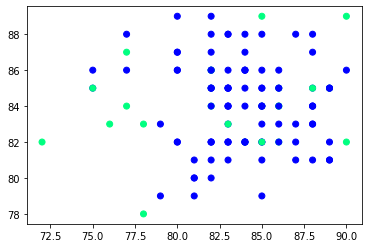

In [ ]:
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap='winter')

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Membuat model SVM terhadap Training set 
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma='auto', C=2)
classifier.fit(X_train, y_train)

SVC(C=2, gamma='auto')

In [ ]:
from sklearn import metrics
y_pred = classifier.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)

Confusin Matrix
[[32  1]
 [ 6  1]]
 Test Set: 40
 Accuracy = 82.5 %


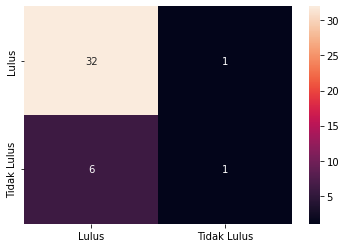

In [ ]:
from sklearn.metrics import confusion_matrix
import pickle
cm = confusion_matrix(y_test, y_pred)
print("Confusin Matrix")
print(cm)

sns.heatmap(cm, annot=True, xticklabels=["Lulus","Tidak Lulus"],yticklabels=["Lulus","Tidak Lulus"])
print(f" Test Set: {len(X_test)}")
print(f" Accuracy = {acc*100} %")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        33
           1       0.50      0.14      0.22         7

    accuracy                           0.82        40
   macro avg       0.67      0.56      0.56        40
weighted avg       0.78      0.82      0.78        40

